In [1]:
%matplotlib notebook

import random
import time
import sys
import numpy as np
from matplotlib.pyplot import *

In [2]:
def init():
    global count, xs, ys, a, b, learning_rate
    # input data
    count = 100
    max_dist = 20
    xs = np.linspace(0, 100, count)
    ys = xs + np.random.normal(size=count) * max_dist
    # linear approximation coefficients
    a = random.randint(-5, 5)
    b = random.randint(5, 5)
    # hyperparameters
    learning_rate = 0.0001

In [3]:
def error():
    return 0.5 / count * sum(((a * x + b) - ys[i]) ** 2 for i, x in enumerate(xs));

In [4]:
def gradient_descent_step():
    global a, b
    new_a = a - learning_rate * 1 / count * sum(((a * x + b) - ys[i]) * x for i, x in enumerate(xs))
    new_b = b - learning_rate * 1 / count * sum(((a * x + b) - ys[i]) for i, x in enumerate(xs))
    a, b = new_a, new_b

<IPython.core.display.Javascript object>


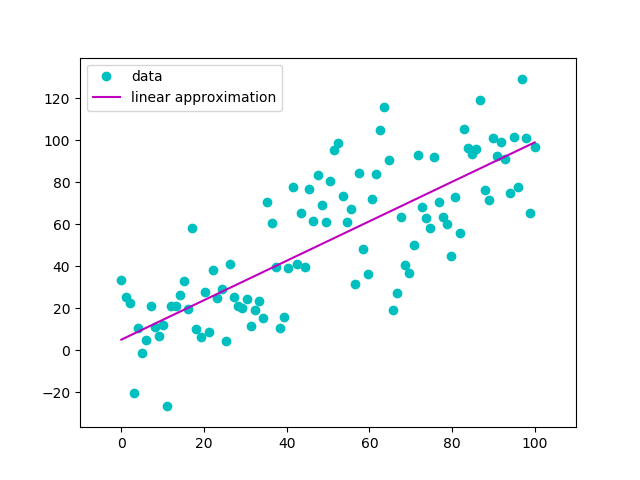

In [5]:
axes = subplot(111)
margin = 10

def draw():
    axes.clear()
    axes.set_xlim([min(xs) - margin, max(xs) + margin])
    axes.set_ylim([min(ys) - margin, max(ys) + margin])
    axes.plot(xs, ys, 'oc', label='data')
    axes.plot(xs, a * xs + b, '-m', label='linear approximation')
    legend()

In [6]:
# run this cell multiple times to check 

init()
previous_err = sys.float_info.max

print("     epoch |    a    |    b    | error")
print("%10s | %+7.2f | %+7.2f | %4.2f" % ('init', a, b, error()))

for epoch in range(1000000):
    gradient_descent_step()
    err = error()
    print("%10d | %+7.2f | %+7.2f | %4.2f" % (epoch+1, a, b, err)) #, end='\r')
    if err > previous_err or abs(err - previous_err) < 0.01:
        break
    previous_err = err

draw()

     epoch |    a    |    b    | error
      init |   -2.00 |   +5.00 | 14719.61
         1 |   -1.01 |   +5.01 | 6631.98
         2 |   -0.36 |   +5.02 | 3056.41
         3 |   +0.08 |   +5.03 | 1475.64
         4 |   +0.37 |   +5.04 | 776.78
         5 |   +0.56 |   +5.04 | 467.81
         6 |   +0.69 |   +5.04 | 331.21
         7 |   +0.77 |   +5.04 | 270.82
         8 |   +0.83 |   +5.04 | 244.13
         9 |   +0.87 |   +5.04 | 232.32
        10 |   +0.89 |   +5.04 | 227.10
        11 |   +0.91 |   +5.04 | 224.80
        12 |   +0.92 |   +5.04 | 223.78
        13 |   +0.93 |   +5.04 | 223.33
        14 |   +0.93 |   +5.04 | 223.13
        15 |   +0.93 |   +5.04 | 223.04
        16 |   +0.94 |   +5.04 | 223.00
        17 |   +0.94 |   +5.04 | 222.98
        18 |   +0.94 |   +5.04 | 222.97
